In [7]:
import torch
import cv2
from torchvision.utils import draw_segmentation_masks
from torchvision.transforms.functional import to_pil_image
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm

input_dir = "/kaggle/input/blood-vessel-segmentation/"
train_dir = input_dir + "/train/"
imgs_dir = f"{train_dir}kidney_1_dense/images/"
msks_dir = f"{train_dir}kidney_1_dense/labels/"
preds_dir = input_dir + "kidney_1_dense_preds/"
slices_ids = sorted(os.listdir(imgs_dir))

In [8]:
# I think this to strategies are (almost?) equivalent TODO: CHECK THE VERASITY OF THIS AFIRMATION; RIGHT NOW I'M TOO TIRED
# 1
# img = (img / 35000).clip(max=1)
# 2
# img = img.clip(35000) / 35000
 
# Now this is a bit different because .max() is not necesarily 35000, but from what I've seem it mostly is.
# img = img.clip(35000) / img.clip(35000).max()

# if the maximum value of the image is less than 35000, then this just becomes
# img = img / img.max()
# which is the same behaviour that gives bad performance, so maybe that is the reason why this is strategy performs worse than constant scaling.




In [10]:
maxes = []
for slice_id in tqdm(slices_ids):
    max_val = np.array(Image.open(imgs_dir + slice_id)).max()
    if max_val <= 35000:
        maxes.append(max_val)

100%|██████████| 2279/2279 [00:46<00:00, 48.53it/s] 


In [11]:
print(len(maxes))
maxes

644


[34143,
 32157,
 34066,
 33835,
 34320,
 33076,
 32249,
 29344,
 29504,
 29510,
 29783,
 29981,
 29759,
 33201,
 30666,
 29813,
 34888,
 29894,
 29555,
 33332,
 29577,
 30135,
 29540,
 29641,
 29453,
 29594,
 29694,
 29649,
 30830,
 31033,
 29699,
 30495,
 29966,
 30078,
 29890,
 29698,
 30273,
 30105,
 30531,
 31184,
 31121,
 30236,
 30590,
 30353,
 32829,
 30611,
 30425,
 30986,
 31053,
 31781,
 31357,
 31482,
 31368,
 31415,
 31412,
 31237,
 31685,
 31874,
 31958,
 31698,
 32228,
 31176,
 31193,
 31169,
 31653,
 31222,
 33768,
 33505,
 33671,
 32169,
 32009,
 31308,
 32125,
 31555,
 32741,
 32294,
 32174,
 31729,
 32130,
 32898,
 32206,
 32689,
 32810,
 33268,
 34749,
 34050,
 33112,
 33427,
 32635,
 33124,
 34928,
 34972,
 32820,
 34050,
 32251,
 32036,
 32214,
 33557,
 34770,
 31982,
 32529,
 32792,
 32800,
 31771,
 32025,
 32639,
 32127,
 31967,
 31623,
 31911,
 33346,
 32136,
 33131,
 32720,
 34254,
 34117,
 34385,
 34190,
 32010,
 32130,
 32080,
 31939,
 32079,
 33078,
 31615,


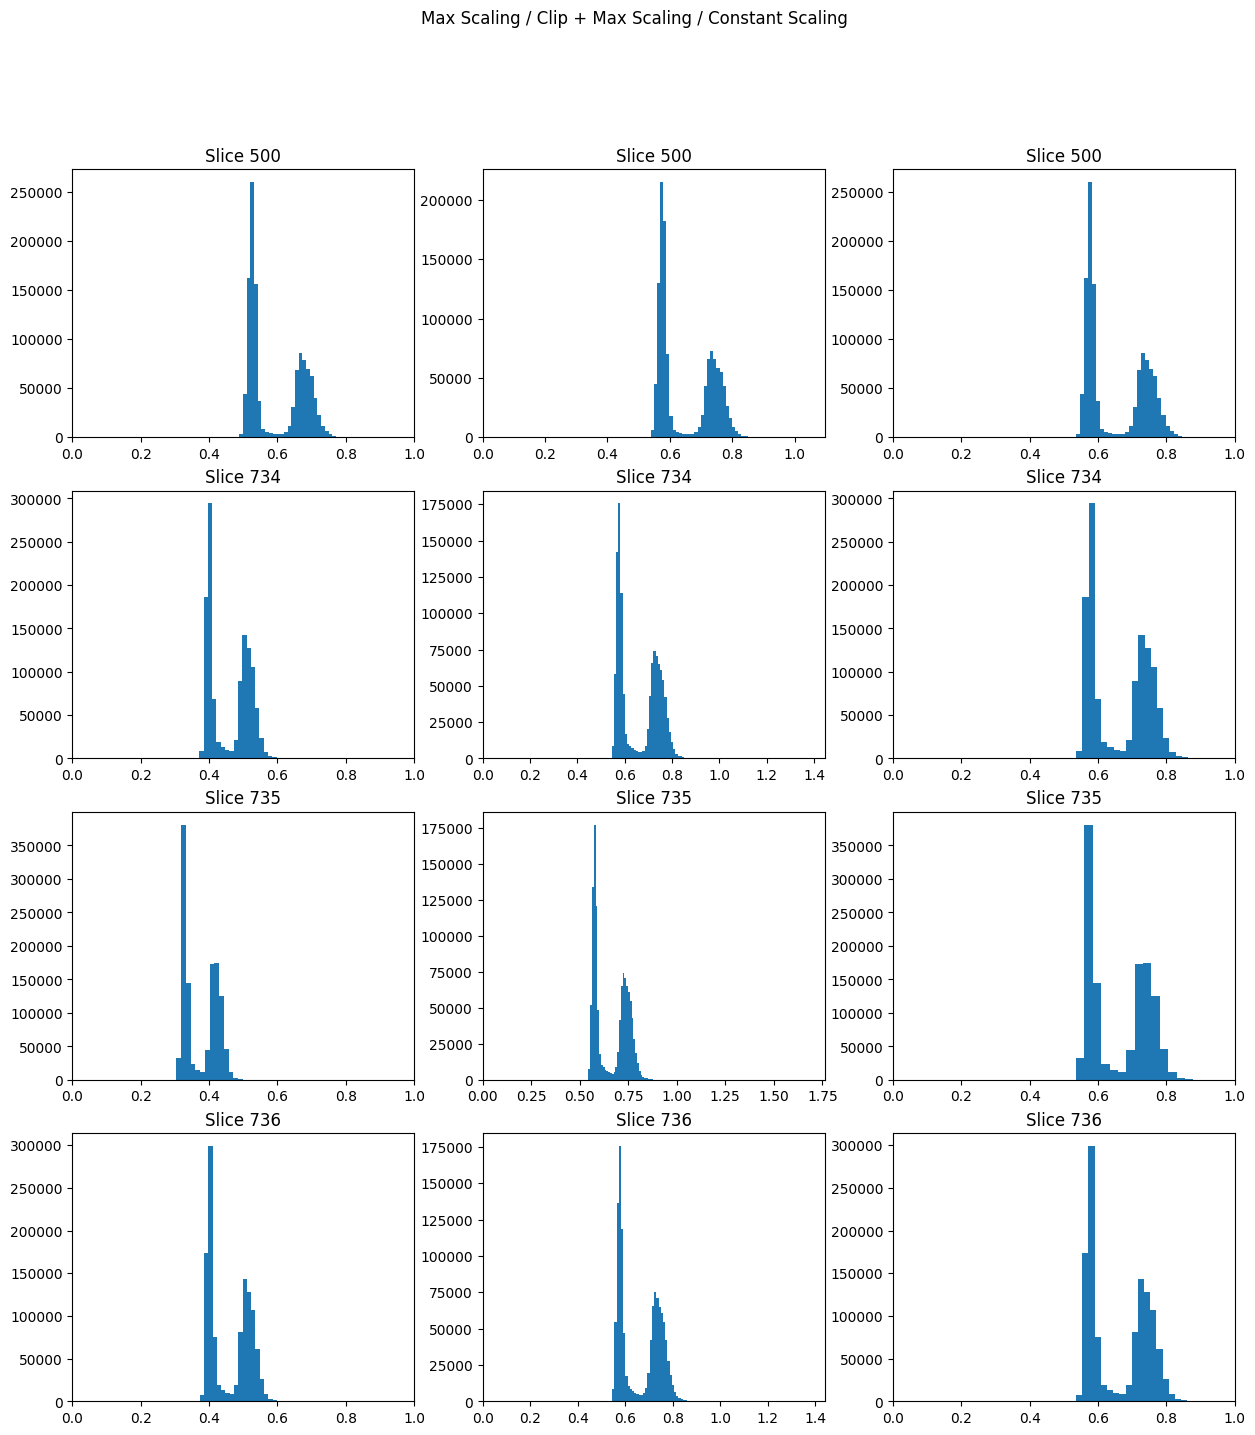

In [10]:
ids = [500, 734, 735, 736]
# ids = np.random.randint(low=0, high=len(slices_ids), size=(5,))
const_scale = 35000
fig, axs = plt.subplots(len(ids), 3, figsize=(15, 4 * len(ids)))
fig.suptitle("Max Scaling / Clip + Max Scaling / Constant Scaling")


def three_norms(img, const):
    return img / img.max(), img / const, img.clip(max=const) / img.clip(max=const).max()

for axs_idx, id in enumerate(ids):


    img = np.array(Image.open(imgs_dir + slices_ids[id]))i
    max_img, const_img, clipped_img = three_norms(img, const_scale)

    axs[axs_idx, 0].set_xlim([0, 1.5])
    axs[axs_idx, 1].set_xlim([0, 1.5])
    axs[axs_idx, 2].set_xlim([0, 1.5])
    axs[axs_idx, 0].set_xlim([0, max_img.max()])
    axs[axs_idx, 1].set_xlim([0, const_img.max()])
    axs[axs_idx, 2].set_xlim([0, clipped_img.max()])

    axs[axs_idx, 0].set_title(f"Slice {id}")
    axs[axs_idx, 1].set_title(f"Slice {id}")
    axs[axs_idx, 2].set_title(f"Slice {id}")

    axs[axs_idx, 0].hist(max_img.reshape(-1), 50)
    axs[axs_idx, 1].hist(clipped_img.reshape(-1), 50)
    axs[axs_idx, 2].hist(const_img.reshape(-1), 50)

plt.show()